# Laboratory #03 : Filters and Edges

At the end of this laboratory, you would get familiarized with

*   Convolution
*   Image Filters
*   Edge detection

## **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---

Authors:
- Joaquim Marset Alsina
- Jesús Molina Rodríguez de Vera

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import color, data, exposure, feature, filters, io, morphology, util
from skimage import img_as_float, img_as_ubyte

# Convolution
Hint: 
*   *convolve function is available in skimage.filters.edges module*

### Exercise:
*   Read 'camera' image from the data module
*   Convolve the image with a horizontal mask:  (1 x 15) with all values set to one.

Shell you  normalize the mask before convolving the image with it? Why?

What types the mask and the image should be? Justify your answer.

What is the range of values before and after the convolution?

In [ ]:
# solution
camera_img = data.camera()

# We convert the image to floating point to perform the operations
camera_img_f = img_as_float(camera_img)

mask_1_15 = np.ones((1,15))/15

convolved_1_15_img = filters.edges.convolve(camera_img_f, mask_1_15)
convolved_1_15_img_uint = img_as_ubyte(convolved_1_15_img)

print(f"Before: [{np.amin(camera_img)}, {np.amax(camera_img)}]")
print(f"After: [{np.amin(convolved_1_15_img_uint)}, {np.amax(convolved_1_15_img_uint)}]")

Before: [0, 255]
After: [5, 244]


The weights must be normalized for several reasons. First and foremost, if the weights sum up more than one then we could obtain values out of the range: greater than 255 if working with integers or greater than 1 if working with float images. Moreover, it is often a desirable characteristic for a linear filter that the constant zones of the image do not change their value when applying such a filter. That is not possible if the sum of the weights is not one.

We should use floating-point types for both the image and the mask to avoid losing precision during the computations. After the operations have been performed, we can convert them back to `uint8` to display it.

As we can see in the result of the code cell, the range of values has shrunk.

*   Convolve the image with a vertical mask:  (15 x 1) with  values set to one

In [ ]:
# solution
mask_15_1 = np.ones((15, 1))/15

convolved_15_1_img = filters.edges.convolve(camera_img_f, mask_15_1)
convolved_15_1_img_uint = img_as_ubyte(convolved_15_1_img)

*   Convolve the image with a 2D mask:  (15 x 15) with  values set to one

In [ ]:
# solution
mask_15_15 = np.ones((15, 15))/(15*15)

convolved_15_15_img = filters.edges.convolve(camera_img_f, mask_15_15)
convolved_15_15_img_uint = img_as_ubyte(convolved_15_15_img)

*   Visualize the original image, horizontal convolution, vertical convolution, 2D convolution using matplotlib subplot.

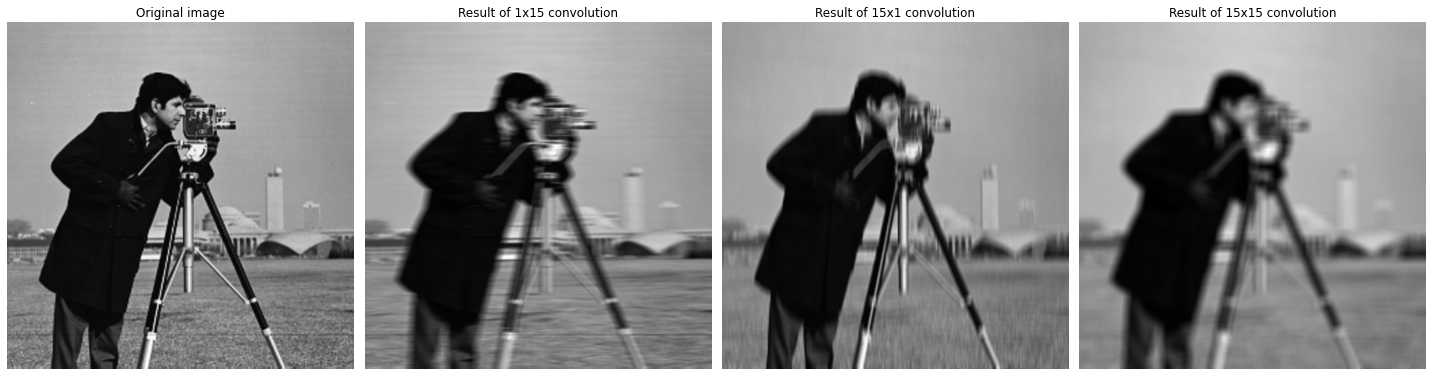

In [ ]:
# solution
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(20, 6)

for ax in axes:
    ax.axis('off')

axes[0].imshow(camera_img, cmap='gray')
axes[0].set_title("Original image")

axes[1].imshow(convolved_1_15_img_uint, cmap='gray')
axes[1].set_title("Result of 1x15 convolution")

axes[2].imshow(convolved_15_1_img_uint, cmap='gray')
axes[2].set_title("Result of 15x1 convolution")

axes[3].imshow(convolved_15_15_img_uint, cmap='gray')
axes[3].set_title("Result of 15x15 convolution")

fig.tight_layout();

*   Apply 2 stage convolution: Horizontal mask (1 x 15) with all values set to 1 followed by vertical mask (15 x 1) with all values set to 1
*   Visualize the original image, 2D convolved image, 2 stage convolved image using matplotlib subplot.


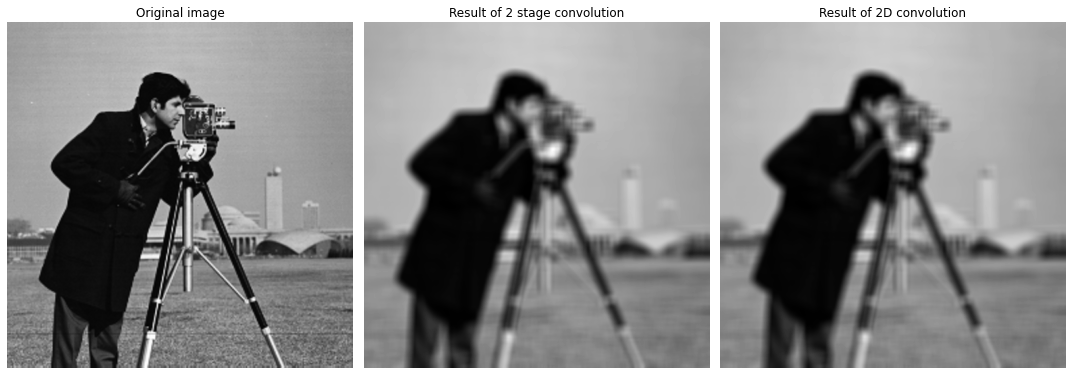

In [ ]:
# solution
two_stage_convolved_img = filters.edges.convolve(convolved_1_15_img, mask_15_1)
two_stage_convolved_img_uint = img_as_ubyte(two_stage_convolved_img)

fig, axes = plt.subplots(1, 3)
fig.set_size_inches(15, 6)

for ax in axes:
    ax.axis('off')

axes[0].imshow(camera_img, cmap='gray')
axes[0].set_title("Original image")

axes[1].imshow(two_stage_convolved_img_uint, cmap='gray')
axes[1].set_title("Result of 2 stage convolution")

axes[2].imshow(convolved_15_15_img_uint, cmap='gray')
axes[2].set_title("Result of 2D convolution")

fig.tight_layout();

In [ ]:
# Compare floating point images
np.amax(np.abs(convolved_15_15_img - two_stage_convolved_img))

2.55351295663786e-15

In [ ]:
# Compare uint8 images
np.array_equal(convolved_15_15_img_uint, two_stage_convolved_img_uint)

True

*   Is the result different from applying convolution with 2D mask (15 x 15) with all values set to 1?

**Solution**

As we can appreciate visually (and we can confirm numerically), the resulting images are the same. The small difference (of the order of $10^{-15}$) is due to approximation errors, but theoretically, the result should be the same (because they are [separable filters](https://en.wikipedia.org/wiki/Separable_filter)). Indeed, when converting back to `uint8` images the results are identical.

# Image Blurring




### Exercise: Gaussian Filter
*   Read 'astronaut' image from the data module
*   Shell you convert the image into grayscale?
*   Apply a gaussian filter with sigma=1
*   Hint: *gaussian function is available in skimage.filters module*

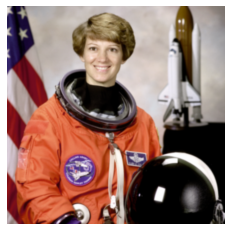

In [ ]:
# solution
astronaut_img = data.astronaut()
plt.imshow(filters.gaussian(astronaut_img, sigma=1, multichannel=True))
plt.axis('off');

We don't have to convert the image to grayscale because the gaussian filter implemented in skimage is able to handle RGB images. Moreover concretely, each channel is filtered independently, and the final image is the result of combining the filtered channels.

*   Why is blurring important?


**Solution**

Blurring consists in making the details in an image less sharp by smoothing the intensity transition between pixels. Blurring is achieved by applying the convolution operation using a kernel, that will move along each pixel of the image and will produce some operation (e.g. linear combination of neighbour pixels in a gaussian filter).

In particular, we use blurring to reduce the noise in an image. By combining the intensity of neighbour pixels we can reduce those sudden changes of intensity caused by noisy pixels that should not be there (e.g. low-pass filter that removes high-frequency noise like the Gaussian filter). However, this also causes the sudden changes that represent edges in the image to be also smoothed. We can consider it a trade-off, given that we do not want to lose details in our image, but at the same time we do not want to have noise that degrades the quality of the image.

Other uses of blurring can be found in the literature and the industry. For example, blurring is a common data augmentation technique used in machine learning for computer vision.

*   Apply a gaussian filter with sigma=0. What is the result of this operation?

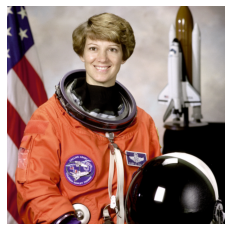

In [ ]:
# solution
astronaut_img_sigma0 = filters.gaussian(astronaut_img, sigma=0, multichannel=True)
plt.imshow(astronaut_img_sigma0)
plt.axis('off');

In [ ]:
# We check that the images are indeed equal (after converting back to the original range and datatype)
np.array_equal(astronaut_img, util.img_as_ubyte(astronaut_img_sigma0))

True

The result is the same input image, as the gaussian distribution with $\sigma=0$ concentrates all the probability in the mean. Therefore, the resulting filter has a one in the center and zeros elsewhere.

*   Vary the value of sigma in the gaussian filter. Apply sigma=0.25, 0.5, 1, 1.5, 2, 5
*   Visualize the different results using matplotlib subplot.

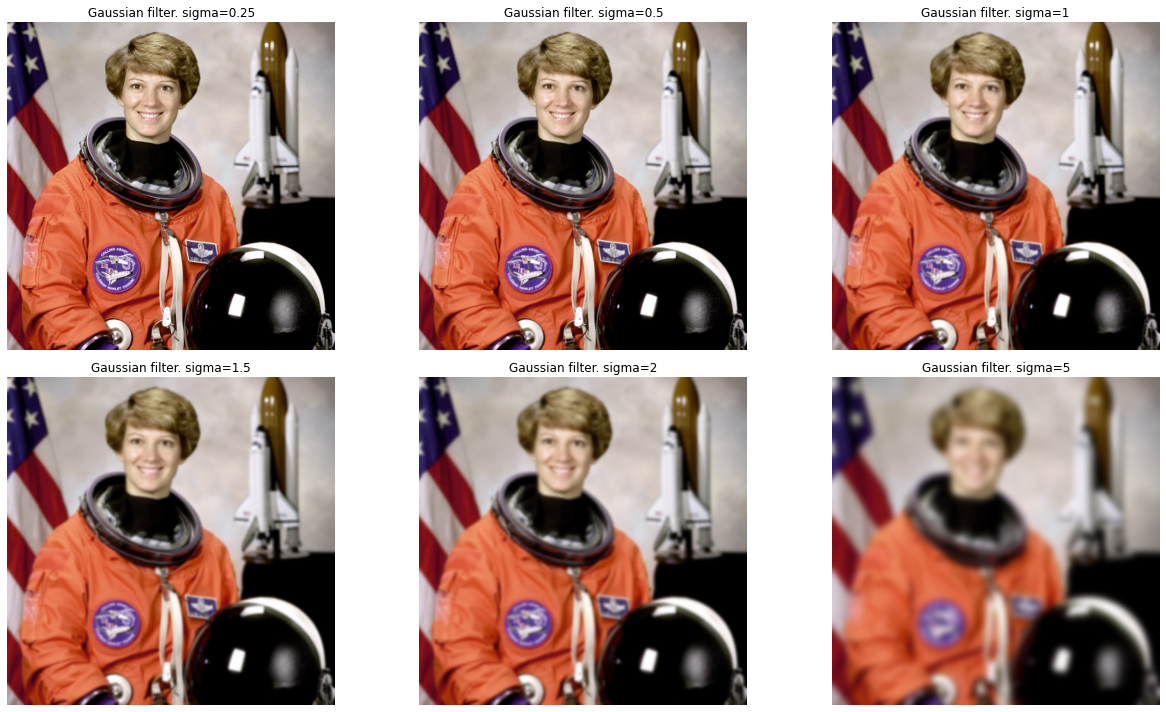

In [ ]:
# solution
sigmas = [0.25, 0.5, 1, 1.5, 2, 5]

# Plot the results
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(18, 10)

for ax in axes.flatten():
    ax.axis('off')

for j, s in enumerate(sigmas):    
    axes[j//3, j%3].imshow(filters.gaussian(astronaut_img, sigma=s, multichannel=True))
    axes[j//3, j%3].set_title(f"Gaussian filter. sigma={s}")

fig.tight_layout()

*    What happens when a larger sigma value is used and what happens when a smaller sigma value is used in the gaussian filter?
*    What determines the optimal sigma value?




**Solution**

The larger the $\sigma$ value, the more blurred the resulting image will be. That is because a gaussian distribution with a higher $\sigma$ has the probability "less concentrated" in the values near the mean. In other words, the greater the sigma, the higher will be the weight assigned to the points that are further from the central pixel.

There is no optimal value for $\sigma$, as it depends on the perception. It seems clear that, if that value is too high ($5$), we lose a lot of information and indeed the face is hard to recognize. On the other hand, with values below $1$, we appreciate little to no changes in the images. Perhaps the central values ($1$ and $1.5$) are a good trade-off between both extremes. However, as always, the final decision would depend on the specific application.

### Exercise: Median Filter

*   Apply median filter with a disk structuring element of radius 1, 5, 10
*   Shell you convert the 'astronauts' image to grayscale?
*   Visualize the original image and the filtered image matplotlib subplot.

In this case, we do need to transform the image to grayscale as the function `filters.rank.meadian` only accepts 2D arrays as input.
Another option would be treating every channel independently and stacking the
filtered channels to obtain a final solution.

We will apply both approaches (in this code cell and in the next one)

/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


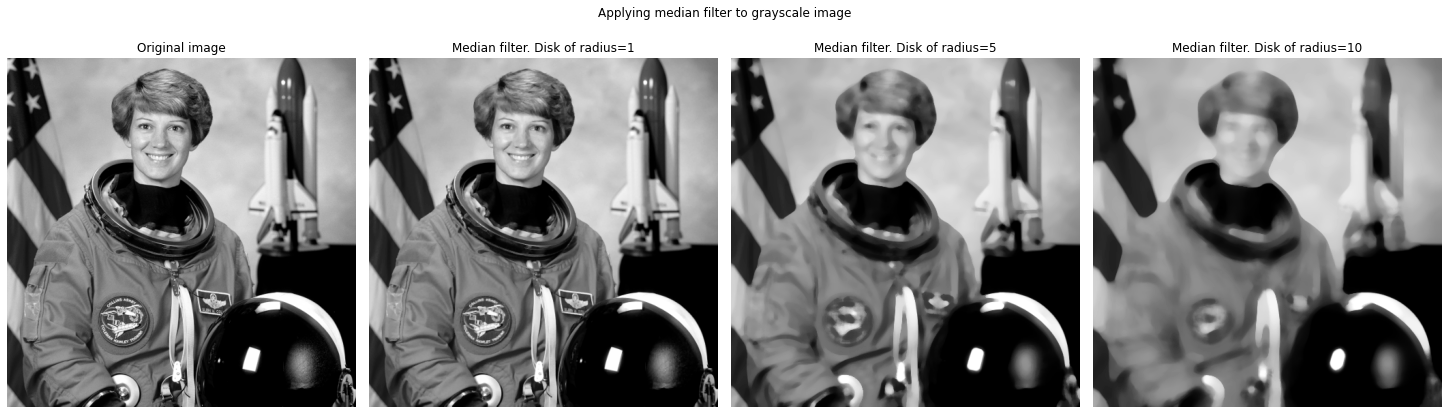

In [ ]:
# solution

# In this case, we do need to transform the image to grayscale as the function 
# `filters.rank.meadian` only accepts 2D arrays as input.
# Another option would be treating every channel independently and stacking the
# filtered channels to obtain a final solution.
# We will apply both approaches (in this code cell and in the next one)

astronaut_img_gray = color.rgb2gray(astronaut_img)

radii = [1, 5, 10]

# Grayscale
# Plot the results
fig, axes = plt.subplots(1, 4, constrained_layout=True)
fig.set_size_inches(20, 6)

for ax in axes:
    ax.axis('off')

axes[0].imshow(astronaut_img_gray, cmap='gray')
axes[0].set_title("Original image")

for i, r in enumerate(radii):
    j = i+1
    img_coins_median = filters.rank.median(astronaut_img_gray, morphology.selem.disk(r))
    axes[j].imshow(img_coins_median, cmap="gray")
    axes[j].set_title(f"Median filter. Disk of radius={r}")

fig.suptitle("Applying median filter to grayscale image");

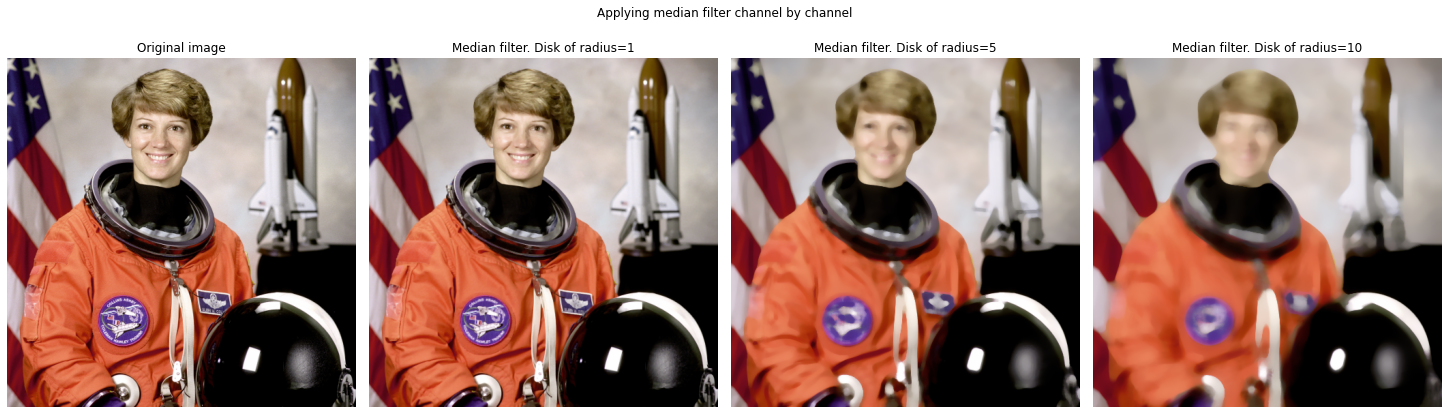

In [ ]:
# Channel-by-channel
# Plot the results
fig, axes = plt.subplots(1, 4, constrained_layout=True)
fig.set_size_inches(20, 6)

for ax in axes:
    ax.axis('off')

axes[0].imshow(astronaut_img)
axes[0].set_title("Original image")

for i, r in enumerate(radii):
    j = i+1
    img_coins_median = np.zeros_like(astronaut_img)
    disk_r = morphology.selem.disk(r)
    for c in range(3):
        img_coins_median[:,:,c] = util.img_as_ubyte(filters.rank.median(astronaut_img[:,:,c], disk_r))
    axes[j].imshow(img_coins_median, cmap="gray")
    axes[j].set_title(f"Median filter. Disk of radius={r}")

fig.suptitle("Applying median filter channel by channel");

As we can see, results in both cases are very similar.

*   Change the structuring element to square, rectangle and diamond
*   Visualize the original image and the filtered image using matplotlib

**Note:** from now on, we will only use the channel-wise approach for the sake of simplicity and clarity.

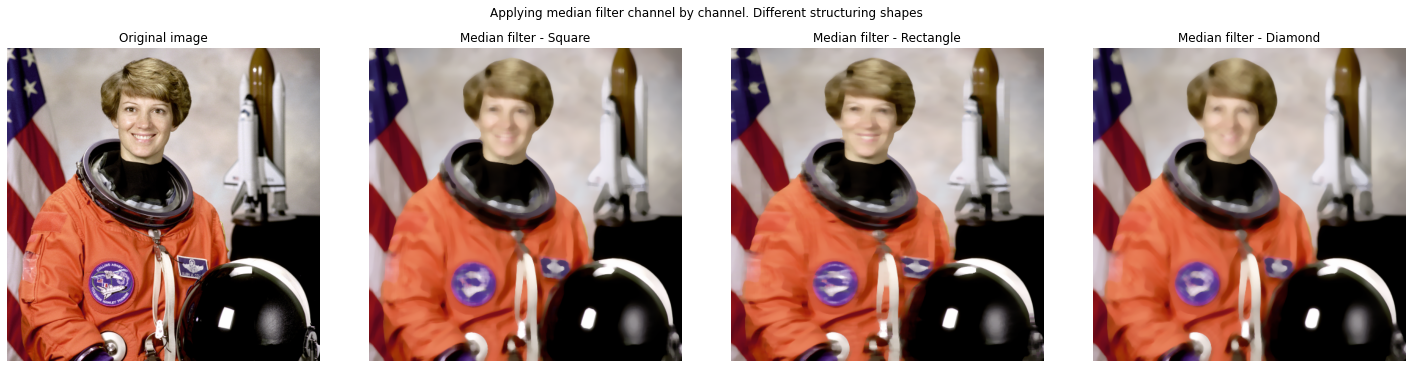

In [ ]:
# solution
# Plot the results
fig, axes = plt.subplots(1, 4, constrained_layout=True)
fig.set_size_inches(20, 5)


def filter_channels(img, filter_func, selem):
    """
    Assumes img is a RGB ubyte image
    """
    result = np.zeros_like(img)
    for c in range(img.shape[-1]):
        result[:,:,c] = util.img_as_ubyte(filter_func(img[:,:,c], selem))
    return result


for ax in axes:
    ax.axis('off')

axes[0].imshow(astronaut_img)
axes[0].set_title("Original image")
axes[1].imshow(filter_channels(astronaut_img, filters.rank.median, morphology.selem.square(10)))
axes[1].set_title("Median filter - Square")
axes[2].imshow(filter_channels(astronaut_img, filters.rank.median, morphology.selem.rectangle(5,15)))
axes[2].set_title("Median filter - Rectangle")
axes[3].imshow(filter_channels(astronaut_img, filters.rank.median, morphology.selem.diamond(8)))
axes[3].set_title("Median filter - Diamond")


fig.suptitle("Applying median filter channel by channel. Different structuring shapes");

*   What is the effect of the structuring element on the median filter?


**Solution**

The main differences can be appreciated between the rectangular filter and the other two. The image is more horizontally distorted in the case of the rectangular filter (as we could expect). This can be seen, for example, in the white robe that is hanging in the astronaut's chest. There, part of the robe completely disappears and it is now orange.
A similar situation occurs with the badge on the left side of the astronaut's suit. This phenomenon is easy to explain: the rectangle is wider, so very thin elements (in the horizontal axis) do not apport as much as their surroundings when it comes to computing the median.

The other two shapes (rectangle and diamond) produce results that are perceptually very similar. Some small differences can be appreciated in the stars of the flag. While the square maintains a spiky shape (that resembles more a star), in the case of the diamond the stars seem more rounded. If one thinks about both shapes, the reason for these results is clear.

*   What is the difference between the gaussian filter, mean filter and median filter?
*   Provide an example where each one would be used.


**Solution**

The mean filter is a linear filter, like the ones we have seen in the theory lessons. It replaces the value in a pixel "$a$" by the average of the values of the pixels in a given neighbourhood of "$a$". Therefore, the weights of this filter have the constant value of $\frac{1}{n}$ where $n$ is the size of the kernel (number of pixels).

The Gaussian filter is also linear. However, as discussed in the last delivery, the weights are not constant. Instead of following a uniform probability distribution, the weights are assigned based on the density function of a normal distribution: a gaussian function. Therefore, the closer a pixel is to the centre,  the greater is the weight assigned.

The median filter, on the other hand, is not linear. That is, it cannot be seen in terms of a weighted filter as is the case of the other two. Instead of that, the median filter is applied as follows:
1. The values of the pixels in a given neighbourhood of the central pixel are sorted by their numerical order.
2. The pixel value that is in the middle of that sorted list, will be the value of the central pixel in the image.

Because of the facts mentioned above, the median filter uses values that are already present in the image. However, applying mean or Gaussian filters can lead to the inclusion of values that were not in the original image. 

Therefore, a median filter could be more useful when we do not want to introduce "artificial" values in an image. For example, when dealing with salt and pepper noise, the median filter seems to be the best option. The mean and gaussian filters would "smooth" the image in the surroundings of the noisy pixel, so that pixel would affect the final result. However, if using the median filter the noisy value (which would be at the beginning or at the end of the sorted list) would be replaced by another valid value present in the image.

Another advantage of the median filter when it comes to removing noise from an image is that they tend to keep the edges of the images sharper, as they do not introduce intermediate values (like the mean and gaussian filters).

The other two filters seem suitable to smooth images as they are low-pass filters (remove high-frequency features). They are also useful for image blurring, as the details are removed. Moreover, from a computational point of view, applying convolutions is much more efficient than applying the median filter.

### Exercise: Effect of noise

It is easy to add noise to an image using the random_noise function available in skimage.util

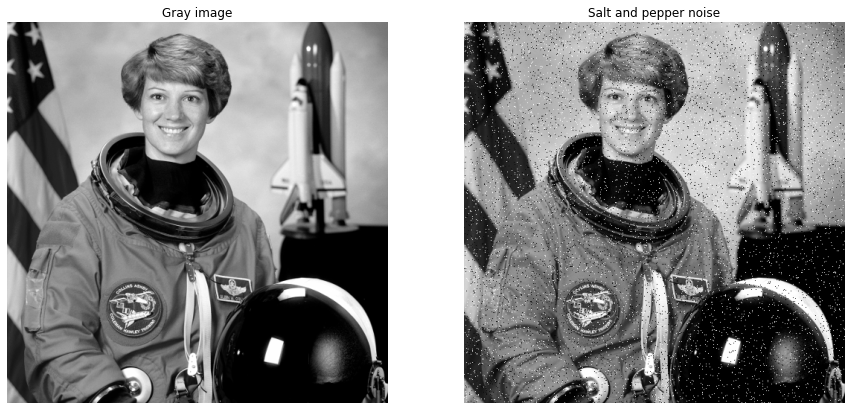

In [ ]:
from skimage.util import random_noise
image = data.astronaut()
image = color.rgb2gray(image)

img_noise = random_noise(image, mode='s&p')  # salt and pepper noise is added

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Gray image')
ax[0].axis('off')
ax[1].imshow(img_noise, cmap='gray')
ax[1].set_title('Salt and pepper noise')
ax[1].axis('off')

plt.show()

*   Create noisy images with **gaussian** noise.
*   Apply the mean filter, median filter and gaussian filter in each of the noisy images.
*   Repeat the same on a noisy images with **salt and pepper** noise.
*   Visualize the images and observe the difference in each filter with respect to the noise.

/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


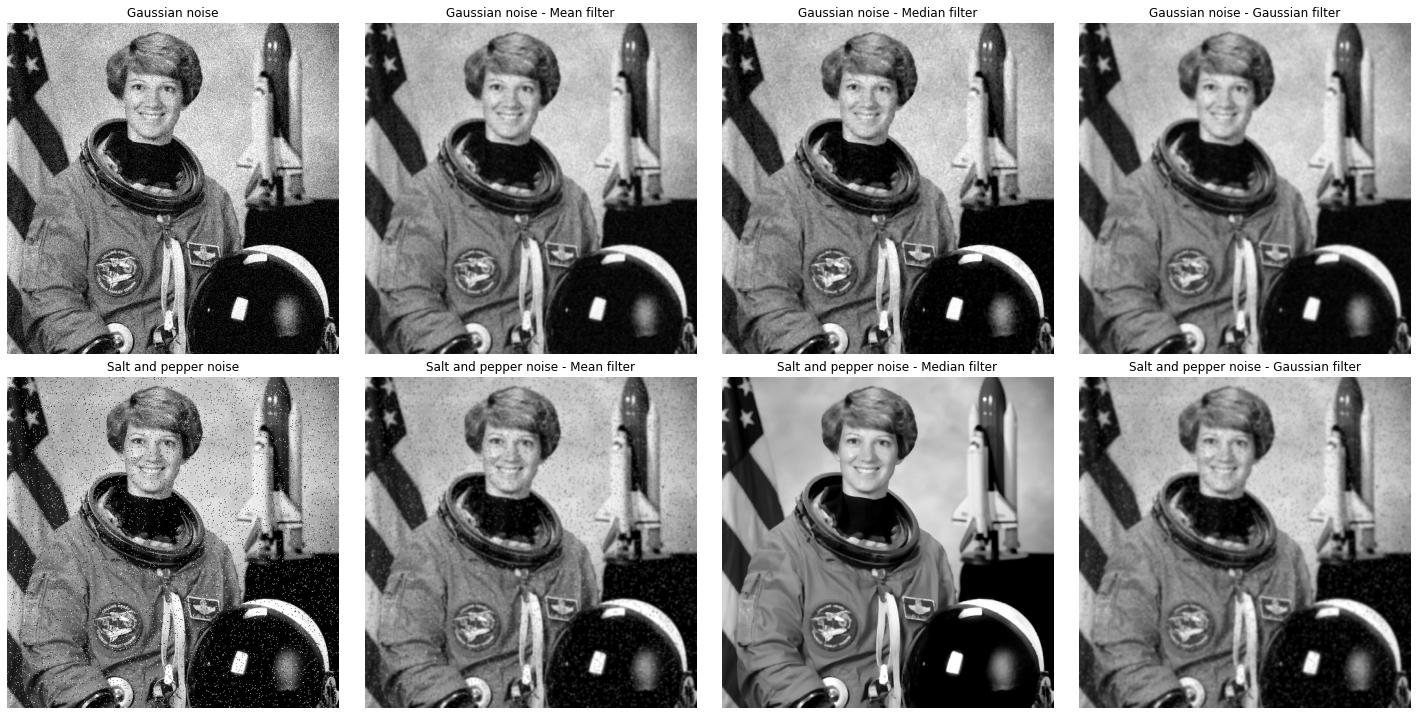

In [ ]:
# solution
image_noise_gauss = random_noise(image, mode="gaussian")
image_noise_sap = random_noise(image, mode="s&p")

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
for ax in axes.flatten():
    ax.axis('off')

disk = morphology.selem.disk(2)

axes[0,0].imshow(image_noise_gauss, cmap="gray")
axes[0,0].set_title("Gaussian noise")
axes[1,0].imshow(image_noise_sap, cmap="gray")
axes[1,0].set_title("Salt and pepper noise")
axes[0,1].imshow(filters.rank.mean(image_noise_gauss, disk), cmap="gray")
axes[0,1].set_title("Gaussian noise - Mean filter")
axes[0,2].imshow(filters.rank.median(image_noise_gauss, disk), cmap="gray")
axes[0,2].set_title("Gaussian noise - Median filter")
axes[0,3].imshow(filters.gaussian(image_noise_gauss, sigma=1.5), cmap="gray")
axes[0,3].set_title("Gaussian noise - Gaussian filter")
axes[1,1].imshow(filters.rank.mean(image_noise_sap, disk), cmap="gray")
axes[1,1].set_title("Salt and pepper noise - Mean filter")
axes[1,2].imshow(filters.rank.median(image_noise_sap, disk), cmap="gray")
axes[1,2].set_title("Salt and pepper noise - Median filter")
axes[1,3].imshow(filters.gaussian(image_noise_sap, sigma=1.5), cmap="gray")
axes[1,3].set_title("Salt and pepper noise - Gaussian filter")

fig.tight_layout()

*   Which filter works better for gaussian noise and which filter works better for salt and pepper noise? Explain your choice of the filter for that particular type of noise.


**Solution**

- **Gaussian noise**: the noisy image seems to need some smoothing. That is why the mean and the gaussian filter perform better than the median filter in this particular task (see exercise above). Particularly:
    + The gaussian filter has removed more noise than the other two images. However, it also produces more blurred edges.
    + The median filter does not remove much noise. The differences with the gaussian filter can be appreciated in the face of the astronaut, in the flag or in the background wall (for example). However, more definite edges are kept when using the median filter (look, for example, at the badges).
    + The mean filter produces an intermediate result between the other two filters.
Given how the gaussian noise works (applies noise based on a probability normal distribution), it makes sense that low-pass filters perform better when it comes to removing it.

- **Salt and pepper noise**: 
    + The median filter is clearly the best performant. Indeed the resulting image is very similar to the original one.
    + The other two filters are not able to eliminate the noise, and they only spread in the image.


As we can see, most of these experimental findings support our reasoning made in the previous exercise.

# Edge Detection

### Exercise:
*   Read the 'camera' image from the data module
*   Perform sobel and prewitt edge detection on the image
*   Compare the buildin function performance vs applying a convolution with the Sobel/Prewitt mask
*   Visualize the original image, the edges and the edges superimposed on the original image

In [ ]:
def detect_edges(img, filter_x, filter_y, filters_normalized = False):
    """
    Params:
        img: The image where the edges will be detected. It needs to be uint8 
            and in the range of [0, 255]
        filter_x: the filter used to detect vertical edges. Can be normalized or not
        filter_y: the filter used to detect horizontal edges. Can be normalized or not
        filters_normalized: True if the coefficients are normalized, False otherwise
    Returns:
        edges_img: The image containing the edges. It will be uint8 and in the 
            range of [0, 255]
    """
    float_img = img_as_float(img)
    # Compute the derivatives in the x direction (i.e. vertical edges)
    vertical_edges_img = filters.edges.convolve(float_img, filter_x)
    # Compute the derivatives in the y direction (i.e. horizontal edges)
    horizontal_edges_img = filters.edges.convolve(float_img, filter_y)
    # Compute the gradient magnitude (i.e. edge strength)
    edges_img = np.sqrt(vertical_edges_img**2 + horizontal_edges_img**2)
    
    """ Normalize the gradients to be in the range of [0.0, 1.0] 
        if the filters were not normalized """
    if not filters_normalized:
        min_value = np.min(edges_img)
        max_value = np.max(edges_img)
        edges_img = (edges_img - min_value) / (max_value - min_value)
    
    return img_as_ubyte(edges_img)

In [ ]:
# solution
camera_img = data.camera()

# Masks
sobel_filter_x = np.array([[1, 0, -1], 
                           [2, 0, -2], 
                           [1, 0, -1]])
sobel_filter_y = np.array([[1, 2, 1], 
                           [0, 0, 0], 
                           [-1, -2, -1]])

prewitt_filter_x = np.array([[1, 0, -1], 
                             [1, 0, -1], 
                             [1, 0, -1]])
prewitt_filter_y = np.array([[1, 1, 1], 
                             [0, 0, 0], 
                             [-1, -1, -1]])

# Convolve with Sobel
sobel_edges_img = detect_edges(camera_img, sobel_filter_x, sobel_filter_y)
# convolve with Prewit
prewitt_edges_img = detect_edges(camera_img, prewitt_filter_x, prewitt_filter_y)

# Built-in functions
""" These functions already transform the image to the range [0.0, 1.0], 
    but they do not transform it back to [0, 255] """
sobel_edges_builtin_img = img_as_ubyte(filters.sobel(camera_img))
prewitt_edges_builtin_img = img_as_ubyte(filters.prewitt(camera_img))

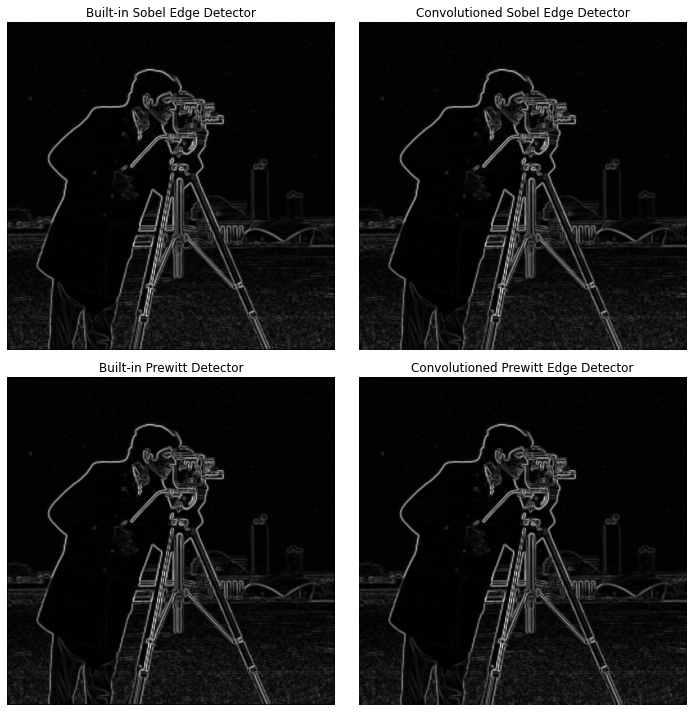

In [ ]:
fig, axs = plt.subplots(2, 2)

fig.set_size_inches(10, 10)

for ax in axs.flatten():
    ax.axis('off')

axs[0, 0].imshow(sobel_edges_builtin_img, cmap = 'gray')
axs[0, 1].imshow(sobel_edges_img, cmap = 'gray')
axs[1, 0].imshow(prewitt_edges_builtin_img, cmap = 'gray')
axs[1, 1].imshow(prewitt_edges_img, cmap = 'gray')

axs[0, 0].set_title('Built-in Sobel Edge Detector')
axs[0, 1].set_title('Convolutioned Sobel Edge Detector')
axs[1, 0].set_title('Built-in Prewitt Detector')
axs[1, 1].set_title('Convolutioned Prewitt Edge Detector')

fig.tight_layout()

As you can see, simply looking at the resulting detected edge images, differences cannot be seen between each of the methods, and all 4 images seem equal.

However, we know that there are differences, at least between each pair of Sobel and Prewitt images, given that the Sobel filters give more weight to the central neighbour pixels to compute the derivative. Therefore, even though the edge seems the same, the gradient magnitude of some pixels should be different in both images. This can be seen if we use the `compare_images` method from the `skimage.util` module.

Between using the built-in function, and performing the convolutions ourselves, there should not be differences in the resulting edges, given that we apply the same methodology. However, when computing the differences between the images we will see a bigger difference. This is because the built-in method normalizes the Sobel filters dividing by 4, and the Prewitt by 3, as well as dividing the gradient magnitude by $\sqrt{2}$ ([source code](https://github.com/scikit-image/scikit-image/blob/v0.13.1/skimage/filters/edges.py#L59)).

The reason behind the normalization is because we can see each filter as the composition of a smoothing filter and a differentiation filter. For example, the Sobel $Mx$ filter can be decomposed in the smoothing filter [1 2 1]<sup>T</sup> and the differentiation filter [-1 0 1], $Mx$ = [1 2 1]<sup>T</sup> * [-1 0 1]. We should divide the first one by 4 to normalize, and the second one by 2 to compute the derivative (given that the pixels used to compute the derivative are at a distance of 2).  
Therefore, we should divide the complete filter by 8. As we do not want to perfectly approximate the derivative, nor we are restricted to work in the same intensity as the same image, given that we later normalize the gradients, it is acceptable not to normalize the filters. That is, as they are linear filters, their power to detect edges do not change, it only changes the output by a constant multiplicative factor.
The same happens with the Prewitt filters, but the normalization of the smoothing filter would be accomplished by dividing by 3.

The reason behind the division by $\sqrt{2}$ is to compute the average of the square of derivative in both directions when computing the gradient magnitude. Again, the ability to detect edges does not change by applying this average or not, but it is important to take into account the scale of possible values that we are dealing with. Because of that, the normalization step (to the filters or the gradient magnitudes) is recommended.

Therefore, the only difference between the built-in methods and the ones obtained via convolution is a constant multiplicative factor. This difference can be later addressed by normalizing the gradients. 

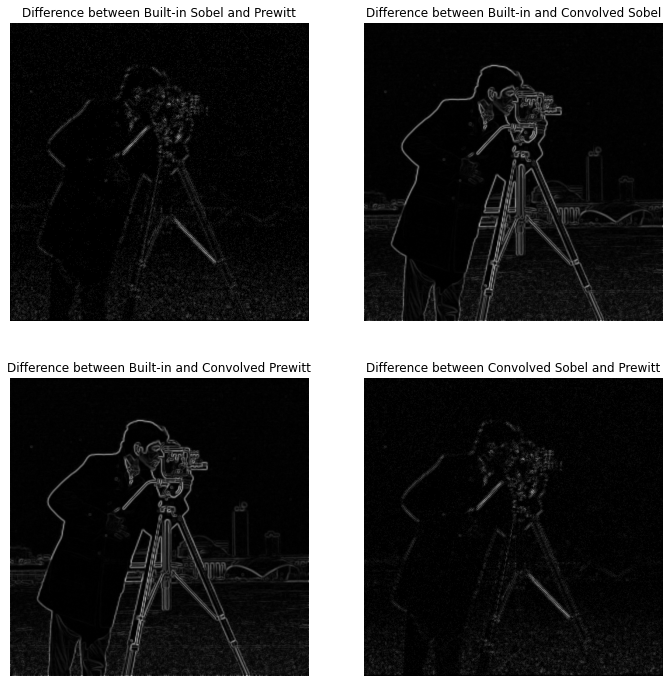

In [ ]:
dif_bin_sobel_prewitt_img = util.compare_images(sobel_edges_builtin_img, prewitt_edges_builtin_img)
dif_sobels_img = util.compare_images(sobel_edges_builtin_img, sobel_edges_img)
dif_prewitt_img = util.compare_images(prewitt_edges_builtin_img, prewitt_edges_img)
dif_sobel_prewitt_img = util.compare_images(sobel_edges_img, prewitt_edges_img)

fig, axs = plt.subplots(2, 2)

fig.set_size_inches(10, 10)

for ax in axs.flatten():
    ax.axis('off')

axs[0, 0].imshow(dif_bin_sobel_prewitt_img, cmap = 'gray')
axs[0, 1].imshow(dif_sobels_img, cmap = 'gray')
axs[1, 0].imshow(dif_prewitt_img, cmap = 'gray')
axs[1, 1].imshow(dif_sobel_prewitt_img, cmap = 'gray')

axs[0, 0].set_title('Difference between Built-in Sobel and Prewitt')
axs[0, 1].set_title('Difference between Built-in and Convolved Sobel')
axs[1, 0].set_title('Difference between Built-in and Convolved Prewitt')
axs[1, 1].set_title('Difference between Convolved Sobel and Prewitt')

fig.tight_layout()

Here, we can see the differences between each method. As mentioned, we see a bigger difference when comparing the built-in functions and using convolutions. It seems like we are seeing simply the original image of the detected edges instead of the difference. But simply applying the mentioned changes we would obtain a completely black image (i.e. no difference).

Comparing the Sobel and Prewitt methodologies, either using the built-in function, or using convolutions, we see that the differences are mainly in the diagonal edges, in the noise-like edges the methods have detected where the grass was present in the original image, and in the sky where some grey noise can be observed.

We believe these differences are produced because of the different weights the Sobel filter have in the middle row of each filter, giving more weights to those neighbours when computing the derivatives, resulting in the detection of stronger edges.
It is true, however, that both have limitations, as those tiny edges detected in the grass are mainly noise in the final results.

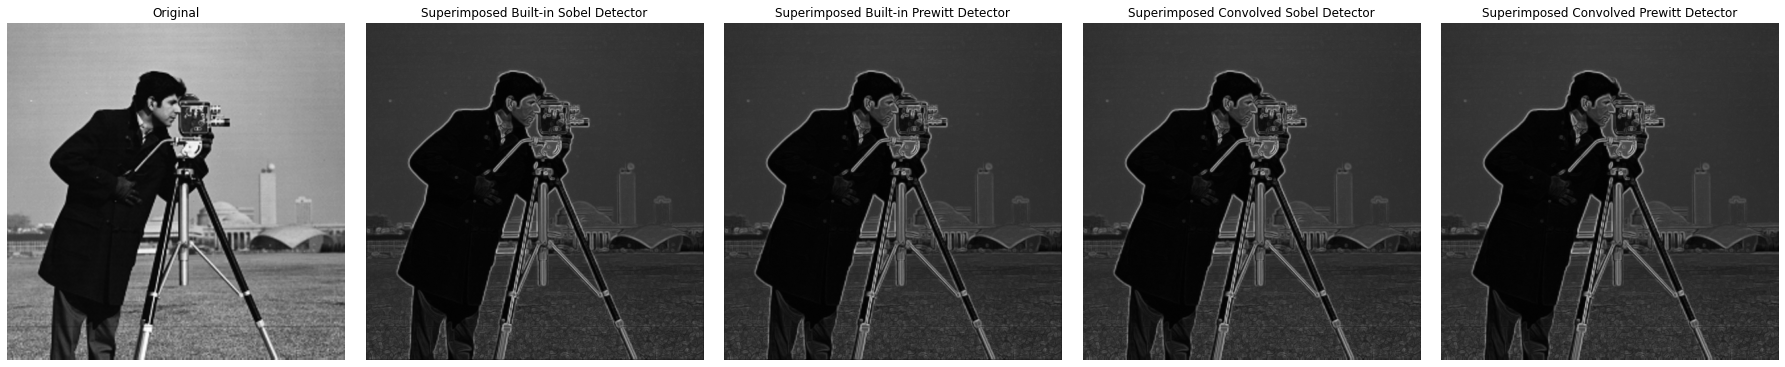

In [ ]:
fig, axs = plt.subplots(1, 5)

fig.set_size_inches(25, 25)

for ax in axs.flatten():
    ax.axis('off')

axs[0].imshow(camera_img, cmap = 'gray')

axs[1].imshow(camera_img, cmap = 'gray')
axs[1].imshow(sobel_edges_builtin_img, cmap='gray', alpha=0.7)

axs[2].imshow(camera_img, cmap = 'gray')
axs[2].imshow(prewitt_edges_builtin_img, cmap='gray', alpha=0.7)

axs[3].imshow(camera_img, cmap = 'gray')
axs[3].imshow(sobel_edges_img, cmap='gray', alpha=0.7)

axs[4].imshow(camera_img, cmap = 'gray')
axs[4].imshow(prewitt_edges_img, cmap='gray', alpha=0.7)

axs[0].set_title('Original')
axs[1].set_title('Superimposed Built-in Sobel Detector')
axs[2].set_title('Superimposed Built-in Prewitt Detector')
axs[3].set_title('Superimposed Convolved Sobel Detector')
axs[4].set_title('Superimposed Convolved Prewitt Detector')

fig.tight_layout()


*   What is the difference between each of the edge detectors?
*   What do you think is the limitation of each of the detector?



**Solution**

Please, refer to be above cells, as we have explained there the differences. In summary, the main difference is that Sobel, by applying non-uniform weights, gives more importance to the closes neighbours. Although one could think that this should lead to better results, in this particular case no differences can be easily detected when plotting the edges found by both methods. On the contrary, in this case, we see that the main difference is in the intensity of the edges, as we obtain with Sobel higher gradient magnitudes, therefore, bigger pixel intensity in the resulting image showing the detected edges. 

Regarding the limitations, even though both filters apply some smoothing thanks to their smoothing filter, achieving less sensitivity to noise than other smaller filters like for example the Roberts cross filter ([Wikipedia definition](https://en.wikipedia.org/wiki/Roberts_cross)), they are still sensitive to noise when computing the derivatives and the gradients, leading to images where some edges that are detected are caused by noise as they do not appear in the original image. That is why, other methods like Canny, obtain better results as they perform a Gaussian smoothing before computing the gradients.

Another limitation, or disadvantage, is due to this smoothing process: they produce thicker edges in comparison with others like Canny. We consider it to be more accentuated in the case of Sobel because of the bigger filter coefficients.

A third limitation they present is when detecting diagonal edges, given that they focus on detecting changes in the horizontal and vertical axis and then aggregating the results. Indeed, we have seen how the main differences between Sobel and Prewitt are precisely in those diagonal edges (i.e. diagonal gradients). This indicates that one of the methods struggles more than the other in those kinds of edges. From our point of view, because of the non-uniform weights, Sobel is the one that is less sensitive to that problem. We have found other filters in the literature that try to overcome this problem like the Scharr filter.

### Exercise: Canny edge detector
*   Read 'camera' image from the data module
*   Apply the Canny operator with default parameters
*   Apply the Canny by varying sigma=1, 3, 5, 10
*   Visualize the original image along with the edges detected using matplotlib.


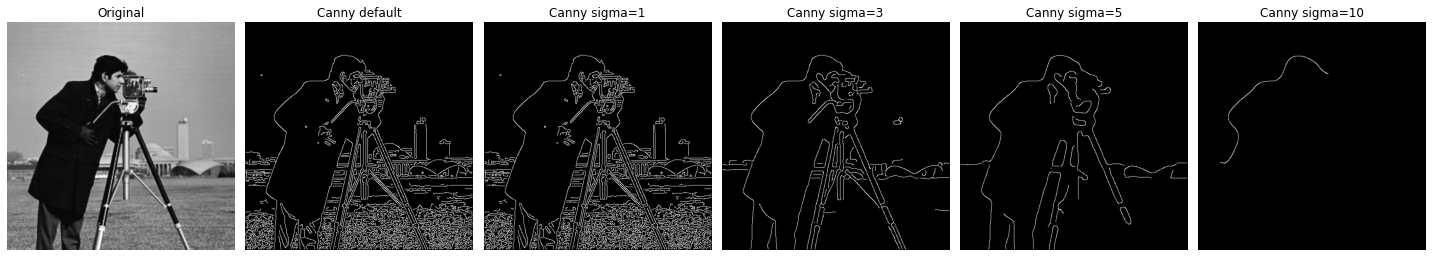

In [ ]:
# solution
camera_img = data.camera()

""" The default canny operator works with sigma 1, given that we are not 
    supposed to change the thresholds, but only the sigmas"""
camera_canny_default_img = feature.canny(camera_img)
camera_canny_1_img = feature.canny(camera_img, sigma=1)
camera_canny_3_img = feature.canny(camera_img, sigma=3)
camera_canny_5_img = feature.canny(camera_img, sigma=5)
camera_canny_10_img = feature.canny(camera_img, sigma=10)

fig, axs = plt.subplots(1, 6)

fig.set_size_inches(20, 10)

for ax in axs:
    ax.axis('off')

axs[0].imshow(camera_img, cmap = 'gray')
axs[1].imshow(camera_canny_default_img, cmap = 'gray')
axs[2].imshow(camera_canny_1_img, cmap = 'gray')
axs[3].imshow(camera_canny_3_img, cmap = 'gray')
axs[4].imshow(camera_canny_5_img, cmap = 'gray')
axs[5].imshow(camera_canny_10_img, cmap = 'gray')

axs[0].set_title('Original')
axs[1].set_title('Canny default')
axs[2].set_title('Canny sigma=1')
axs[3].set_title('Canny sigma=3')
axs[4].set_title('Canny sigma=5')
axs[5].set_title('Canny sigma=10')

fig.tight_layout();

*   What is the effect of varying the sigma values on the edges?
*   What do the high threshold and low threshold parameters denote?
*   Does the Canny operator work on color images?


**Solution**

Increasing the sigma causes the gaussian filter that is applied at the beginning of the Canny edge detector as noise reduction to have a bigger sigma. Bigger sigma means more weight to farthest pixels in the neighbourhood, resulting in smoothed edges (i.e. weaker edges with less gradient magnitude).

Once the gaussian smoothing is applied, when applying the non-max suppression, as we have smoothed the edges, when comparing each pixel with its neighbours to determine if that edge needs to be removed or not (according to the gradient magnitude and direction), fewer edges will remain.

Then, when applying the image hysteresis with the high and low threshold, this will have the effect of removing more edges, as those that have a lower gradient than the low threshold will be also removed, considered as noise that has remained until that moment. If the gradient value is above the high threshold it will be considered a strong edge, and if it is in between the high and low it is considered to be a weak edge. Those weak edges that are close to a strong edge will be connected.

In the case of this image, it can be observed how all the edges detected in the grass with $\sigma$ = 1, do not remain as edges with $\sigma$ = 3, 5 or 10. This is because those edges are too close together, and when the smoothing is applied, all the edges will blur together, not surviving the non-max suppression. Increasing $\sigma$ causes the same effect in other closer edges, until it only remains the edge of the silhouette of the man, given that this edge is far away from others, surrounded only by the sky that does not present edges.

The Canny operator can work on colour images if the image is first transformed to grayscale and then the Canny operator is applied, or it can be done by applying the Canny operator to each colour channel, and then merging the results of each channel. Skimage function only accepts grayscale images, but with the help of other libraries like `OpenCV`, we can apply Canny to each of the 3 channels and then merge them. In the resulting image, if some edge has more strength in a particular channel, it will be displayed with that particular colour. White colours will mean that the strength is equal in three channels.

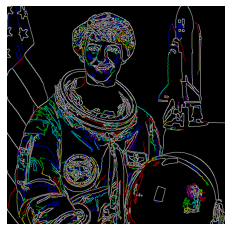

In [ ]:
import cv2

astronaut_img = data.astronaut()

(B_img, G_img, R_img) = cv2.split(astronaut_img)
R_canny_img = cv2.Canny(R_img, 50, 200)
B_canny_img = cv2.Canny(B_img, 50, 200)
G_canny_img = cv2.Canny(G_img, 50, 200)
astronaut_canny_img = cv2.merge([B_canny_img, G_canny_img, R_canny_img])

plt.axis('off')
plt.imshow(astronaut_canny_img);

*   What is the algorithm behind the Canny operator?


**Solution**

The Canny algorithm consists of 5 steps:
* Apply a gaussian filter to reduce the noise
* Detect edges in the different directions using filters, and then find the magnitude and direction of the gradients using the derivatives obtained applying the filters.
* Apply the non-max suppression to the different pixels, using the gradient magnitude and direction, to reduce the thin edges, and keep only those that present the biggest gradient in that particular direction.
That is, each pixel gradient will be compared to those in the positive and negative gradient direction, and if it is the greatest among them, the pixel gradient is kept, otherwise suppressed.
* Given that we are only comparing with the neighbours in the non-max suppression, some edges caused by noise can remain. That is why we use a high threshold and a low threshold to filter even more the edges. If the pixel gradient of an edge is bigger than the high threshold it will be preserved and considered a strong edge. If the gradient is in between the high and low threshold, it will be considered a weak edge and also remain. If the gradient is lower than the low threshold it is suppressed.
* Finally, we apply hysteresis. We consider the strong edges to be real edges in the image, but with the weak edges, it is not that clear. That is why we check the weak edges to determine if they have some strong edge as a neighbour, meaning that they should be kept, and connected to the strong edge, if this happens, and removed otherwise.


---

## **End of P3: Filters and Edges**
Deadline for P3 submission in CampusVirtual is: **Monday, the 25th of October, 2021**
